<a href="https://colab.research.google.com/github/melbow2424/Data-602-Final-Project/blob/main/Final_602.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Abstract**

> For this project, the trading card website called TCG player was scraped for the price guide information from the Pokémon card set called Sword and Shield: Silver Tempest. This price guide was then used on a personal collection of all cards recorded in multiple csv files to determine how much capital was gained from the purchasing of this set’s cards as well as it’s pull rating in a graphical interpretation form. This analysis will also compare the differences between using Python verse R since parts of this project was created in R first then translated into Python. 

> The web scraping was completed in R using rvest package, although the use of the beautifulsoap package in Python was attempted. The card csv file was created by 66 packs of Pokemon cards, each containing 10 cards inside. The data frame was constructed by designating each booster pack as a pack number, then followed with each cards unique ID which can be found at the bottom left corner of a Pokémon card, and finally the card rarity was labeled by using the player’s guide booklet.  

> There was a bit of profit generated by this collection since the most valuable card in the set was pulled. This is a rare occurrence. Most collectable sets don’t generate a return profit. It depends on the set. 






# **Introduction**

> Pokémon cards are a highly collectable card game that was first created back in the late 90s. Since then, Pokémon cards have been sought after for collectable purposes and capital gains by enthusiasts. In this project the latest set of Pokémon cards, “Sword and Shield - Silver Tempest” was purchased and its market price for each card pulled in the personal collection was summed to create a total from the card prices. That total was then compared to the total spent on the personal collection and then the total capital gain was generated.


>> Research Question 1:

>> What is the overall gain from a personal Pokémon collection from the set “Sword and Shield - Silver Tempest”?

> In Pokémon booster packs, cards have different card types. There are some card types that are always present in a pack, like common and uncommon cards. Other types, however, are not present in each pack making there pull rates less probable to pull in a give pack then others. A graphical representation will be shown to go over which cards are seen more often in a pack and which card types are rarely seen in each pack. 

>> Research Question 2:

>> Which card types are the most pulled cards as well as which cards are the least commonly pulled cards in a booster pack from the set “Sword and Shield - Silver Tempest”?


## Loading Packages   

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## CSV Files (3 self created and one webscraped using R)

In [ ]:
#Reading in booster pack samples from booster box, packs, and a confirmed packs. Then a csv file from TCG player website of Silver Tempest Pricing. 
df_booster_box_sample = pd.read_csv('https://raw.githubusercontent.com/melbow2424/Data-606-Final-Project/main/sword_shield_silver_tempest_booster_box_sample%20-%20Sheet1.csv')
df_booster_packs_sample = pd.read_csv('https://raw.githubusercontent.com/melbow2424/Data-606-Final-Project/main/sword_shield_silver_tempest_booster_packs%20-%20Sheet1.csv')
df_confirm_sample = pd.read_csv('https://raw.githubusercontent.com/melbow2424/Data-606-Final-Project/main/sword_shield_silver_tempest_confirm_sample%20-%20Sheet1.csv')
df_price = pd.read_csv('https://raw.githubusercontent.com/melbow2424/Data-602-Final-Project/main/silver_tempest_full.csv')

# Data Wrangling

Data Wrangling the webscraped price guide from csv file created from TCGplayer **website**

In [ ]:
#Removing end of line (\r\r\n) loaded from csv file in df_price
df_price2 = df_price.replace({r'\r\r\n': ''}, regex=True)
#Removing leading and trialing White Spaces
df_price2['name'] = df_price2['name'].str.strip()
df_price2['price'] = df_price2['price'].str.strip()
df_price2['id'] = df_price2['id'].str.strip()
df_price2['rarity'] = df_price2['rarity'].str.strip()
#Removing dollar sign from price column
df_price2['price'] = df_price2['price'].str.replace('$', '')
#Remove all whitespace in id 
df_price2['id'] = df_price2['id'].str.replace(' ','')
#Lowercase of card rarity column
df_price2['rarity'] = df_price2['rarity'].str.lower()
# Converting data type of price to float values
df_price2['price'] = df_price2['price'].astype(float)
# Changing blank values into NaN than drop values for full row in id column 
df_price2 = df_price2.replace(r'^s*$', float('NaN'), regex = True) 
df_price2.dropna(subset = ['id'], inplace = True) 

<ipython-input-3-6ca259ca381c>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_price2['price'] = df_price2['price'].str.replace('$', '')


In [ ]:
#print(df_price2)

In [ ]:
#df_price2.sort_values(by=['price'], inplace=True)
#print(df_price2)

Data Wrangling from personal Pokemon collection

In [ ]:
# Deleting column in booster pack sample
del df_booster_packs_sample['Unnamed: 3']
# Merging all Booster Data Frames together
df_booster_full = pd.concat([df_booster_box_sample, df_booster_packs_sample,df_confirm_sample], ignore_index=True)
#Lowercase of card rarity 
df_booster_full['card_rarity'] = df_booster_full['card_rarity'].str.lower()
#Removing Leading and Trialing White Spaces of id and card_rarity columns
df_booster_full['id'] = df_booster_full['id'].str.strip()
df_booster_full['card_rarity'] = df_booster_full['card_rarity'].str.strip()
# Removing holo v rare with holo rare v
df_booster_full['card_rarity'] = df_booster_full['card_rarity'].str.replace('holo v rare', 'holo rare v')
#remove all whitespace in id 
df_booster_full['id'] = df_booster_full['id'].str.replace(' ','')

In [ ]:
# Merging personal collection with price guide to see total price gained from booster boxes
df_collection_price = pd.merge(df_booster_full, df_price2, on = "id", how = "inner")

In [ ]:
# Deleting column in df_collection_price
del df_collection_price['Unnamed: 0']
del df_collection_price['rarity']

In [ ]:
print(df_collection_price)

     pack_number       id      card_rarity                    name  price
0              1  080/195         uncommon                Beheeyem   0.05
1             48  080/195         uncommon                Beheeyem   0.05
2              1  155/195         uncommon         Emergency Jelly   0.09
3             29  155/195         uncommon         Emergency Jelly   0.09
4             66  155/195         uncommon         Emergency Jelly   0.09
..           ...      ...              ...                     ...    ...
654           61  035/195      holo rare v               Omastar V   0.77
655           31  212/195      secret rare  Energy Switch (Secret)   3.59
656           33  045/195             rare                  Phione   0.07
657           34  140/195      holo rare v                 Ho-Oh V   1.35
658           36  139/195  holo rare vstar             Lugia VSTAR  19.49

[659 rows x 5 columns]


# Data Analysis

In [ ]:
# Subsetting info between cards that are less then and equal to 50 cents and card that were valued greater then 50 cents 
df_collection_price_over50 = df_collection_price[df_collection_price['price'] > 0.5]
df_collection_price_under50 = df_collection_price[df_collection_price['price'] <= 0.5]

In [ ]:
#Sum over card prices that are greater than 50 cents 
df_collection_price_over50['price'].sum()

399.27

In [ ]:
#Sum over card prices that are less than and equal to 50 cents
df_collection_price_under50['price'].sum()

35.25

In [ ]:
#Total Price of generated from collection
df_collection_price['price'].sum()

434.52

In [ ]:
# Calculating amount spent on collection verses if there was any profits generated 
#Booster box cost
booster_box = 125.00
#Elite Trainer box cost (has 8 booster backs)
elite_trainer_box = 35.99
#Booster pack cost
booster_pack = 3.32
#Total spend on cards 
card_spending = booster_box + elite_trainer_box + 22*booster_pack
#Profit made
print((df_collection_price['price'].sum())-card_spending)

200.48999999999998


# EDA

AttributeError: ignored

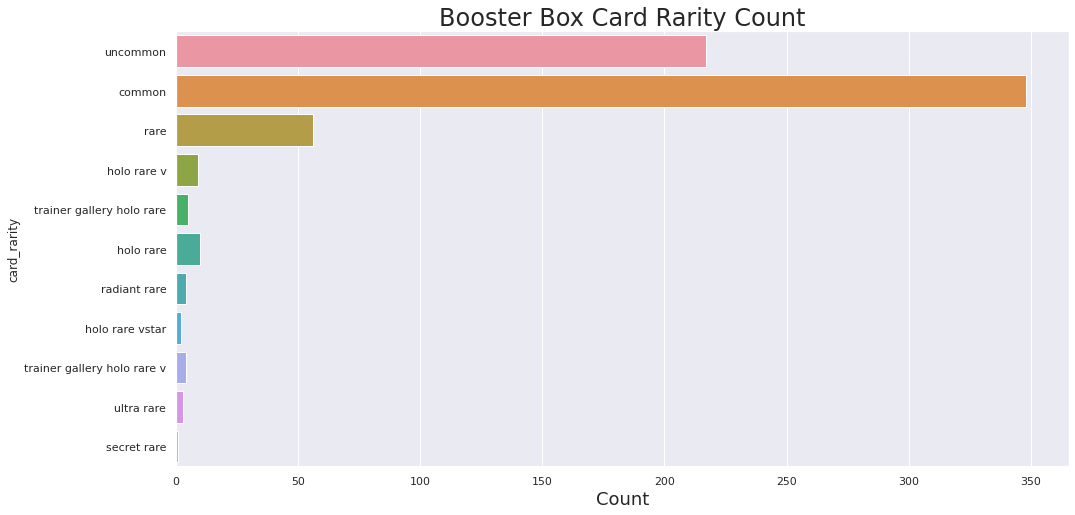

In [ ]:
# Showing which card type is most and least rare card in set 

#define figure size
sns.set(rc={"figure.figsize":(16, 8)}) #width=8, height=4
sns.countplot(y ='card_rarity', data = df_collection_price)
plt.title("Booster Box Card Rarity Count", fontsize = 24)   
plt. xlabel("Count", fontsize = 18, labelsize=14)           
plt. ylabel("Card Rarity", fontsize = 18) 

# Conclusion

The overall total gains of the personal collection were generated by first web scraping directly from the TCGplayer website. Although the process to web scraping using python was not used, finding an alternative to web scraping using R is a perfect work around to get the data.
The first research question concludes that from the personal collection there was about 200 dollars net gain. This is due to a rare card pull. This is not usually the case when purchasing Pokémon cards.    
For the second research question, you can see that the common cards are the most pulled cards in a sample size and the least pulled are secret rare. 
With more time I would have liked to do a confidence interval and linear regression analysis on the cards as I’ve done in R to see how python compares to that process.
